In [5]:
import pickle
import random
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.io import loadmat
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential, load_model
from keras.backend import clear_session
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from IPython.display import display, HTML
# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [6]:
# model_1DCNN = load_model('Model/model_1dcnn.h5')
model_GRU = load_model('Model/model_gru.h5')
model_biGRU = load_model('Model/model_bigru.h5')
model_1DCNNbiGRU = load_model('Model/model_1dcnn_bigru.h5')
model_PCA1DCNNbiGRU = load_model('Model/model_pca_1dcnn_bigru.h5')


# load the training history
# with open('History/1dcnn_accuracy.pkl', 'rb') as f:
#     history_1DCNN = pickle.load(f)
with open('History/gru_accuracy.pkl', 'rb') as f:
    history_GRU = pickle.load(f)
with open('History/bigru_accuracy.pkl', 'rb') as f:
    history_biGRU = pickle.load(f)
with open('History/1dcnn_bigru_accuracy.pkl', 'rb') as f:
    history_1DCNNbiGRU = pickle.load(f)
with open('History/pca_1dcnn_bigru_accuracy.pkl', 'rb') as f:
    history_PCA1DCNNBiGRU = pickle.load(f)


In [7]:
reshaped_data = np.load('reshaped_data.npy')
reshaped_labels = np.load('reshaped_label.npy')
pca_data = np.load('pca_data.npy')

In [8]:
input_train = reshaped_data
output_train = reshaped_labels

# input_train = augmented_data
# output_train = augmented_labels

X_train, X_temp, y_train, y_temp = train_test_split(input_train, output_train, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train's shape:" + str(X_train.shape))
print("y_train's shape:" + str(y_train.shape))
print("X_test's shape:" + str(X_test.shape))
print("y_test's shape:" + str(y_test.shape))
print("X_val's shape:" + str(X_valid.shape))
print("y_val's shape:" + str(y_valid.shape))

X_train's shape:(1982, 10, 2000)
y_train's shape:(1982,)
X_test's shape:(425, 10, 2000)
y_test's shape:(425,)
X_val's shape:(425, 10, 2000)
y_val's shape:(425,)


In [9]:
# input_train = reshaped_data
# output_train = reshaped_labels

input_train = pca_data
output_train = reshaped_labels

# input_train = augmented_data
# output_train = augmented_labels

X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(input_train, output_train, test_size=0.3, random_state=42)
X_valid_1, X_test_1, y_valid_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, random_state=42)

print("X_train's shape:" + str(X_train_1.shape))
print("y_train's shape:" + str(y_train_1.shape))
print("X_test's shape:" + str(X_test_1.shape))
print("y_test's shape:" + str(y_test_1.shape))
print("X_val's shape:" + str(X_valid_1.shape))
print("y_val's shape:" + str(y_valid_1.shape))

X_train's shape:(1982, 10, 1000)
y_train's shape:(1982,)
X_test's shape:(425, 10, 1000)
y_test's shape:(425,)
X_val's shape:(425, 10, 1000)
y_val's shape:(425,)


In [10]:
# DCNN_valid_loss, DCNN_valid_acc = model_1DCNN.evaluate(X_valid, y_valid)
GRU_valid_loss, GRU_valid_acc = model_GRU.evaluate(X_valid, y_valid)
biGRU_valid_loss, biGRU_valid_acc = model_biGRU.evaluate(X_valid, y_valid)
DCNN_biGRU_valid_loss, DCNN_biGRU_valid_acc = model_1DCNNbiGRU.evaluate(X_valid, y_valid)
PCA_DCNN_biGRU_valid_loss, PCA_DCNN_biGRU_valid_acc = model_PCA1DCNNbiGRU.evaluate(X_valid_1, y_valid_1)

14/14 [==============================] - 1s 4ms/step - loss: 1.7461 - accuracy: 0.8400


<Figure size 1200x600 with 0 Axes>

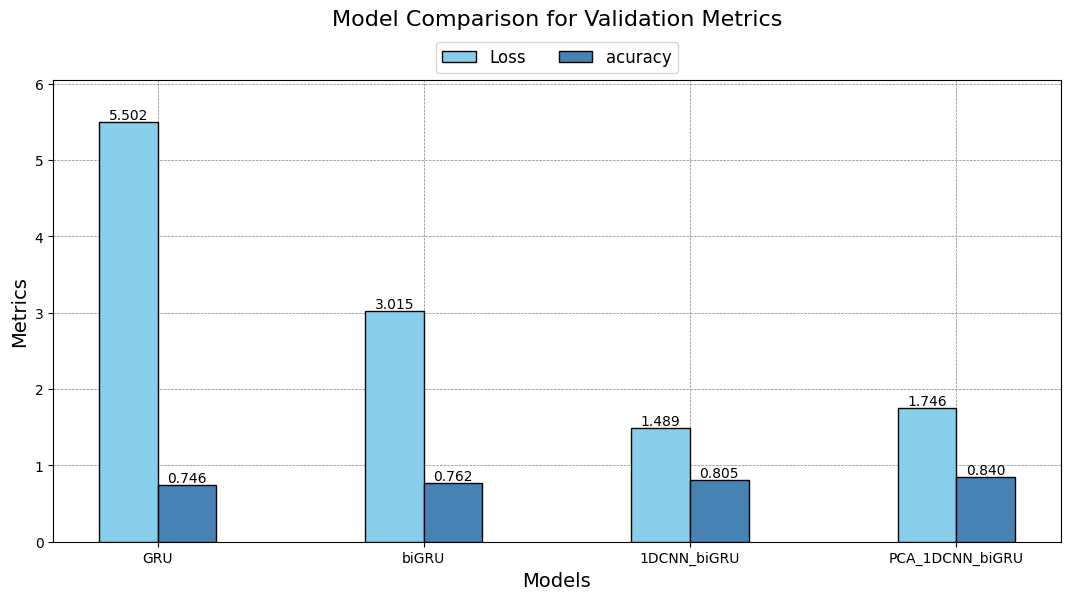

In [11]:
models = ['GRU', 'biGRU', '1DCNN_biGRU', 'PCA_1DCNN_biGRU']
# val_accuracy = [RNN_valid_loss, DCNN_valid_loss, LSTM_valid_loss, GRU_valid_loss, biGRU_valid_loss, DCNN_biGRU_valid_loss]
# val_loss = [RNN_valid_acc, DCNN_valid_acc, LSTM_valid_acc, GRU_valid_acc, biGRU_valid_acc, DCNN_biGRU_valid_acc ]

val_accuracy = [ GRU_valid_loss, biGRU_valid_loss, DCNN_biGRU_valid_loss, PCA_DCNN_biGRU_valid_loss]
val_loss = [GRU_valid_acc, biGRU_valid_acc, DCNN_biGRU_valid_acc, PCA_DCNN_biGRU_valid_acc]

plt.figure(figsize=(12, 6))
# Bar settings
bar_width = 0.22
index = np.arange(len(models))

# Create the plot with a scientific style
# plt.style.use('classic')
fig, ax = plt.subplots(figsize=(13, 6))

# Plot the data with zorder=3 to make sure bars are in front of grid lines
bar1 = ax.bar(index, val_accuracy, bar_width, label='Loss', zorder=3, color='skyblue', edgecolor='black')
bar2 = ax.bar(index + bar_width, val_loss, bar_width, label='acuracy', zorder=3, color='steelblue', edgecolor='black')

# Calculate the max height for a bar to determine text placement
max_height = max(max(val_accuracy), max(val_loss))

# Define a larger offset to move text above the top of the bars
text_offset = max_height * 0.001  # Adjust this factor as needed

# Add text above the bars
for i, rect in enumerate(bar1):
    ax.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{val_accuracy[i]:.3f}', ha='center', va='bottom')

for i, rect in enumerate(bar2):
    ax.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{val_loss[i]:.3f}', ha='center', va='bottom')

ax.set_ylim(0, max_height + max_height * 0.1)  # Add 10% headroom above the tallest bar for text

# Annotate the plot
ax.set_title('Model Comparison for Validation Metrics', fontsize=16, loc='center', y=1.1)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Metrics', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Place the legend above the chart
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=12)

# Add grid lines behind the bars by setting zorder=0
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', zorder=0)

# plt.savefig(os.path.join(figure_path, 'bar valid bi.png'))
# print("Plot saved to '{}'.".format(os.path.join(figure_path, 'bar valid bi.png')))

# Show the plot

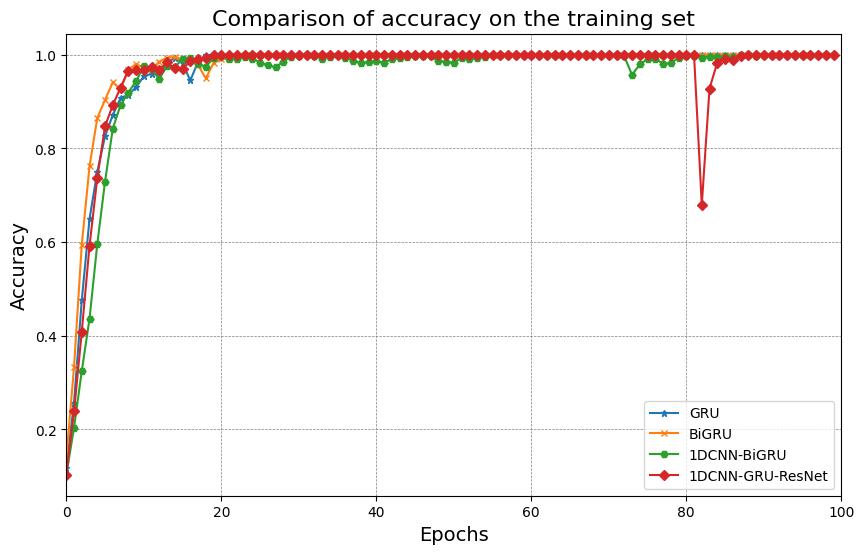

In [12]:
plt.figure(figsize=(10, 6))
# plt.plot(history_1DCNN['train_accuracy'], label='1DCNN',marker='o',markersize=5)
plt.plot(history_GRU['train_accuracy'], label='GRU',marker='*',markersize=5)
plt.plot(history_biGRU['train_accuracy'], label='BiGRU',marker='x',markersize=5)
plt.plot(history_1DCNNbiGRU['train_accuracy'], label='1DCNN-BiGRU',marker='H',markersize=5)
plt.plot(history_PCA1DCNNBiGRU['train_accuracy'], label='1DCNN-GRU-ResNet',marker='D',markersize=5)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("Comparison of accuracy on the training set", fontsize=16)
plt.legend(loc='lower right', fontsize=12, frameon=True, edgecolor='black', facecolor='white')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', zorder=0)
plt.xlim(0, 100)
plt.legend()
plt.legend()
plt.show()

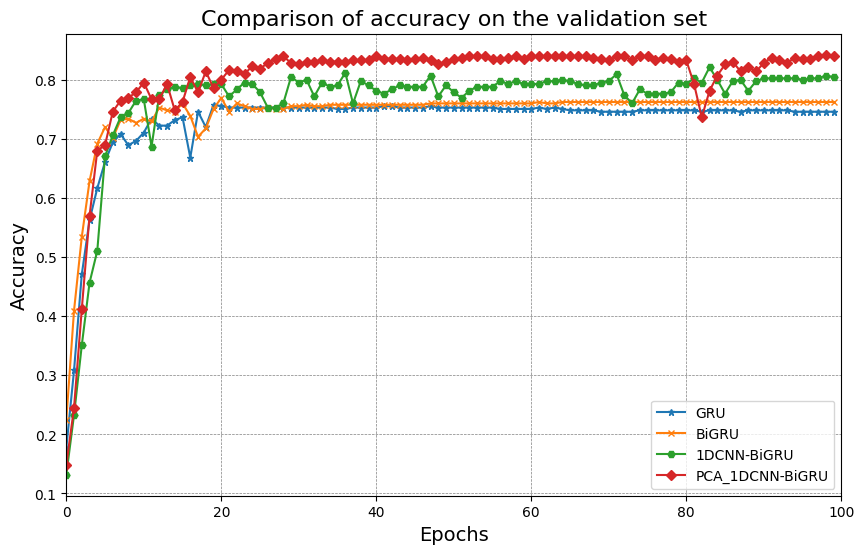

In [14]:
plt.figure(figsize=(10, 6))
# plt.plot(history_1DCNN['val_accuracy'], label='1DCNN',marker='o',markersize=3)
plt.plot(history_GRU['val_accuracy'], label='GRU',marker='*',markersize=5)
plt.plot(history_biGRU['val_accuracy'], label='BiGRU',marker='x',markersize=5)
plt.plot(history_1DCNNbiGRU['val_accuracy'], label='1DCNN-BiGRU',marker='H',markersize=5)
plt.plot(history_PCA1DCNNBiGRU['val_accuracy'], label='PCA_1DCNN-BiGRU',marker='D',markersize=5)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("Comparison of accuracy on the validation set", fontsize=16)
plt.legend(loc='lower right', fontsize=12, frameon=True, edgecolor='black', facecolor='white')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', zorder=0)
plt.xlim(0, 100)
plt.legend()
plt.show()